# Problem:

Identify customer segments: Can we group customers based on their purchase behavior, demographics, and loyalty status? This will help us tailor product recommendations.

- Focus on product recommendation


# Objectives

- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
- **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

    
- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

    
- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

    
- **Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.

    
- **Recommendation System**: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.


# 1. Loading Packages

In [450]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go

# Kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline


## 1.1 Set Theme

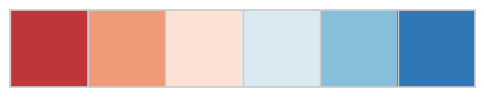

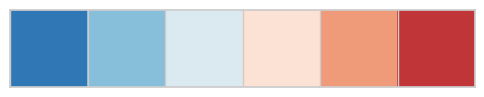

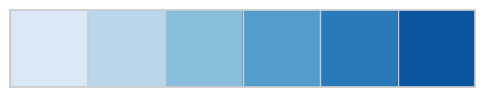

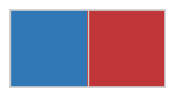

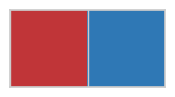

In [451]:
# Set seaborn styles
palette = sns.color_palette("RdBu")
palette_r = sns.color_palette("RdBu_r")
seq_palette =  sns.color_palette("Blues", 6)
sns.set_theme(style='whitegrid', palette=palette_r)
sns.palplot(palette)
sns.palplot(palette_r)
sns.palplot(seq_palette)

# Create 2 color palette
BR = [(0.1843137254901961, 0.47266435986159167, 0.7116493656286044),(0.7561707035755478, 0.21038062283737025, 0.22352941176470587)]
palette2 = sns.blend_palette(BR,2)
sns.palplot(palette2)

# Create 2 color palette
RB = [(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),(0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]
palette2_r = sns.blend_palette(RB,2)
sns.palplot(palette2_r)


(0.7561707035755478, 0.21038062283737025, 0.22352941176470587)
(0.940715109573241, 0.6099192618223759, 0.4812764321414839)
(0.9856978085351787, 0.8889657823913879, 0.8320645905420992)
(0.8605151864667436, 0.9174163783160324, 0.9487120338331411)
(0.530026912725875, 0.7456362937331797, 0.8560553633217994)
(0.1843137254901961, 0.47266435986159167, 0.7116493656286044)
#c13639 #f09c7b #fbe3d4 #dbeaf2 #87beda #2f79b5


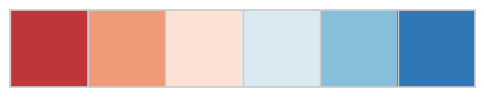

In [452]:
from matplotlib.colors import to_hex

# Get RGB color values from Seaborn palette
palette = sns.color_palette("RdBu")
color1 = palette[0]
color2 = palette[1]
color3 = palette[2]
color4 = palette[3]
color5 = palette[4]
color6 = palette[5]

print(color1)
print(color2)
print(color3)
print(color4)
print(color5)
print(color6)
sns.palplot(palette)

# Convert RGB to hexadecimal
hex_color1 = to_hex(color1)
hex_color2 = to_hex(color2)
hex_color3 = to_hex(color3)
hex_color4 = to_hex(color4)
hex_color5 = to_hex(color5)
hex_color6 = to_hex(color6)

print(hex_color1,hex_color2,hex_color3,hex_color4,hex_color5,hex_color6)  

In [453]:
colors = ['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5']

# 2. Load Dataset

In [454]:
df=pd.read_csv('data/Electronic_sales_Sep2023-Sep2024.csv')            

## 2.1 Dataset Overview

In [455]:
df.head()

Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    2024-03-20      Standard  Accessory,Accessory,Accessory         40.21  
1    2024-04-20     Overnight                   Impulse Item         26.09  
2    2023-10-17       Express                            NaN          0.00  
3    2024-08-09     Overnight      Impulse Item,Impulse Item         60.16  
4    2024-05-21       Express                      Accessory         35.56

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             20000 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

This dataset contains sales transaction records for an electronics company over a one-year period, spanning from September 2023 to September 2024. It includes detailed information about customer demographics, product types, and purchase behaviors.


The dataset consists of 20000 rows and 16 columns. Here`s a brief overview of each column:
- `Customer ID`: Unique identifier for each customer.

**Demographic Features**

- `Age`: Age of the customer (numeric)

- `Gender`: Gender of the customer (Male or Female)


**Product Features**
- `Product Type`: Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)

- `SKU`: a unique code for each product.

- `Unit Price`: Price per unit of the product (numeric)

**Behavioral Features**
- `Loyalty Member`: (Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)

- `Rating`: Customer rating of the product (1-5 stars) (Should have no Null Ratings)

- `Order` Status: Status of the order (Completed, Cancelled)

- `Payment Method`: Method used for payment (e.g., Cash, Credit Card, Paypal)

- `Total Price`: Total price of the transaction (numeric)

- `Quantity`: Number of units purchased (numeric)

- `Purchase Date`: Date of the purchase (format: YYYY-MM-DD)

- `Shipping Type`: Type of shipping chosen (e.g., Standard, Overnight, Express)

- `Add-ons Purchased`: List of any additional items purchased (e.g., Accessories, Extended Warranty)

- `Add-on Total`: Total price of add-ons purchased (numeric)

----


### Observations

- There are missing values in `Add-ons Purchased`.


**Actions**
- change Purchase Date to datetime

## 2.2 Summary Statistics

### Numerical features

In [457]:
# Summary statistics for numerical variables
df.describe()

Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total  
count  20000.000000  20000.000000  
mean       5.485550     62.244848  
std        2.870854     58.058431  
min        1.000000      0.000000  
25%        3.000000      7.615000  
50%        5.000000     51.700000  
75%        8.000000     93.842500  
max       10.000000    292.770000

`Age`
- The age of the customer range from 18 to 80 and average of 48.

`Rating`
- The rating of the customer averages around 3.09. 

`Total Price`:
- mean is 3180 while median is 2534, suggesting right skew distribution. customers spend less

`Unit Price`
- min is $20.75, mean is 578.63 and max is $1139.68. since median is 463.96, unit price is right skewed, more on lower price

`Quantity`
- customers on average pu 5 items which is similar to median.

`Add-on_Total`
- customers can spend up to $292 on add-ons purchases. and on average $51.7 

---
**Questions:**
- Which age bracket spends the most and which spends the least?



### Categorical Features

In [458]:
# Summary statistics for categorical variables
df.describe(include='object').T

count unique                top   freq
Gender             20000      2               Male  10165
Loyalty Member     20000      2                 No  15657
Product Type       20000      5         Smartphone   5978
SKU                20000     10             TBL345   2062
Order Status       20000      2          Completed  13432
Payment Method     20000      6        Credit Card   5868
Purchase Date      20000    366         2024-04-26     88
Shipping Type      20000      5           Standard   6725
Add-ons Purchased  15132     75  Extended Warranty   1701

Check unique values for categorical features

In [459]:
def print_unique_values(df):
    """Prints unique values for each categorical variable in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the categorical variables.
    """

    for col in df.select_dtypes(include=['object']).columns:
        unique_values = df[col].unique()
        print(f"\n{col}:")
        print(unique_values)

print_unique_values(df)


Gender:
['Male' 'Female']

Loyalty Member:
['No' 'Yes']

Product Type:
['Smartphone' 'Tablet' 'Laptop' 'Smartwatch' 'Headphones']

SKU:
['SKU1004' 'SKU1002' 'SKU1005' 'SKU1001' 'SKU1003' 'LTP123' 'SMP234'
 'TBL345' 'HDP456' 'SWT567']

Order Status:
['Cancelled' 'Completed']

Payment Method:
['Credit Card' 'Paypal' 'Cash' 'Debit Card' 'Bank Transfer' 'PayPal']

Purchase Date:
['2024-03-20' '2024-04-20' '2023-10-17' '2024-08-09' '2024-05-21'
 '2024-05-26' '2024-01-30' '2024-06-24' '2023-10-03' '2024-01-01'
 '2024-06-25' '2023-11-07' '2023-09-25' '2024-07-07' '2024-03-18'
 '2024-01-02' '2024-05-18' '2024-09-02' '2024-07-23' '2024-03-14'
 '2024-07-21' '2023-12-02' '2024-04-27' '2024-07-10' '2024-01-29'
 '2024-08-28' '2023-11-28' '2023-11-30' '2024-02-27' '2024-01-21'
 '2024-09-03' '2024-01-12' '2023-09-24' '2024-03-25' '2023-10-12'
 '2024-01-28' '2024-07-08' '2024-07-29' '2024-08-17' '2024-09-23'
 '2024-08-31' '2023-10-16' '2024-06-26' '2024-07-16' '2024-03-05'
 '2023-12-11' '2023-10-28' 

`Gender`
- male occurs more frequently however, it's still a near even split since male makes up 10165/20000 customers

`Loyalty Member`
- majority are non members 

`Product Type`
- Total of 5 product types with smartphones being sold the most.

`SKU`
- total of 10 skus and TBL345 is most purchased

`Payment Method`
- 6 types of payment methods, credit card is used most often
- Paypal is duplicated

`Shipping Type`
- 5 different shipping services offered, standard shipping is most selected

`Add-ons Purchased`
- 75 different add-ons? Extended warranties is most selected
- most likely combination of various add-ons listed in this column.

---

**Actions:**
- Standardize column names (remove spaces)
- fix duplicated paypal for paymeth methods

# 3. Data Cleaning

This step encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes fixing data structures, addressing missing values, eliminating duplicate entries, identifying outliers and other necessary adjustments to prepare the data for in-depth analysis and modeling.



## 3.1 Fix Data Structures

1. Replace space in columns with with "_"
2. Convert `Purchase_Date` to datetime
3. Separate string values from `Add-ons_Purchased` 

### Replace space and "-" in column names with with "_"

In [460]:
df.columns = df.columns.str.replace(" ", "_").str.replace("-", "_").str.lower()
df.head(1)

customer_id  age gender loyalty_member product_type      sku  rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   

  order_status payment_method  total_price  unit_price  quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   

  purchase_date shipping_type              add_ons_purchased  add_on_total  
0    2024-03-20      Standard  Accessory,Accessory,Accessory         40.21

### Convert `purchase_date` to datetime format

In [461]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format="%Y-%m-%d")
df.dtypes

customer_id                   int64
age                           int64
gender                       object
loyalty_member               object
product_type                 object
sku                          object
rating                        int64
order_status                 object
payment_method               object
total_price                 float64
unit_price                  float64
quantity                      int64
purchase_date        datetime64[ns]
shipping_type                object
add_ons_purchased            object
add_on_total                float64
dtype: object

### Replace PayPal with Paypal in  `payment_method`

In [462]:
# Replace PayPal in payment_method with Paypal
df['payment_method'] = df['payment_method'].replace('PayPal', 'Paypal')
df['payment_method'].unique()


array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer'],
      dtype=object)

## 3.2 Handle Duplicates

In [463]:
print('No. of Duplicates:', df.duplicated().sum())

No. of Duplicates: 0


## 3.3 Handle Missing Values

In [464]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values
na_features=[features for features in df.columns if df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in na_features:
    print(
        f"{feature:<15}{np.round(df[feature].isnull().mean(), 4):^10}{'% missing values':>20}")

add_ons_purchased  0.2434      % missing values


Since the focus of project is personalize product recommendation, exclue add on from the dataset. 

In [465]:
df = df.drop(columns=['add_ons_purchased','add_on_total'],axis=1)

Validate Missing Values

In [466]:
df.isnull().sum().sum()

0

the dataset no longer has missing values after removing the `Add_on_Purchased` column

## 3.4 Outlier Detection

In [467]:
# Separate numerical columns 
num_cols = df.select_dtypes(include=['int32','int64','float64']).columns.tolist()
num_cols = num_cols[1:]

print('Rows of Outliers By Feature')

# Print total rows of outliers
unique_outlier_rows = set()
total_outliers = 0

# Loop to cycle through numerical columns and calculate IQR for each 
for col in num_cols:
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    upper_limit = round(Q3 + 1.5 * IQR, 2)
    lower_limit = round(Q1 - 1.5 * IQR, 2)

    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    
    if len(outliers) > 0:
        print(len(outliers),f'{col:<20}',f'lower: {lower_limit:<10}', "/   ", f'upper: {upper_limit}')
        unique_outlier_rows.update(outliers.index)
        total_outliers += len(outliers)




Rows of Outliers By Feature
383 total_price          lower: -4110.2    /    upper: 9889.48


In [468]:
#Create separate column to track outliers, where 1 indicates presence of outliers
df['outliers'] = np.where((df['total_price'] > 9889.48),1, 0)

# Validate outlier column by comfirming value_count of 1 matches the total rows of ouliers printed above

print(df['outliers'].value_counts())


outliers
0    19617
1      383
Name: count, dtype: int64


### 3.4.1 Plot Percentage of Outliers

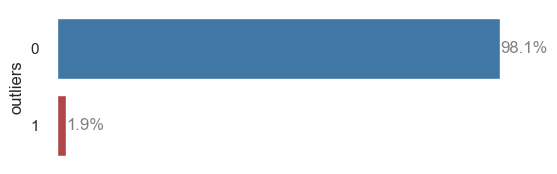

In [469]:
plt.figure(figsize=(6,2))

# Create the horizontal countplot
ax = sns.countplot(y=df['outliers'], palette=palette2)

# Remove spines and ticks, labels
sns.despine(left=True, bottom=True)
ax.set_xticklabels([])
ax.grid(False)
ax.set_xlabel('')

# Calculate total number of rows
total = len(df)

# Annotate percentages on top of each bar
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    ax.annotate(percentage, (p.get_width() + p.get_height() / 2, p.get_y() + p.get_height() / 2),
                ha='left', va='center',color='grey')
    
plt.show()

### 3.4.2 Plot Total Price Outliers

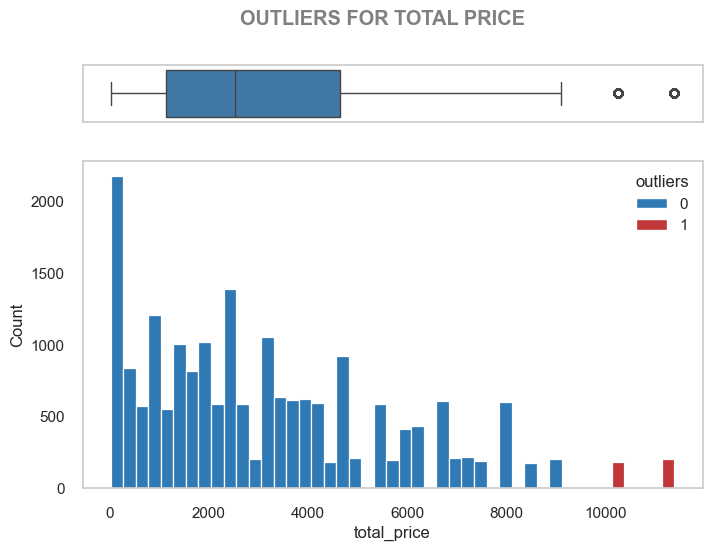

In [470]:
# Create the figure with 2 rows and 3 columns
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

plt.suptitle('OUTLIERS FOR TOTAL PRICE', fontweight='bold',color='grey')

ax1 = sns.boxplot(data=df, x='total_price', orient="h",ax=ax_box)
ax1.set(xlabel='')  # Remove x-axis label for boxplot
ax1.grid(False)  # Remove grid

# Create histogram on second row
ax2 =sns.histplot(data=df, x='total_price',ax=ax_hist,hue='outliers',palette=palette2,alpha=1)
ax2.grid(False)  # Remove grid 

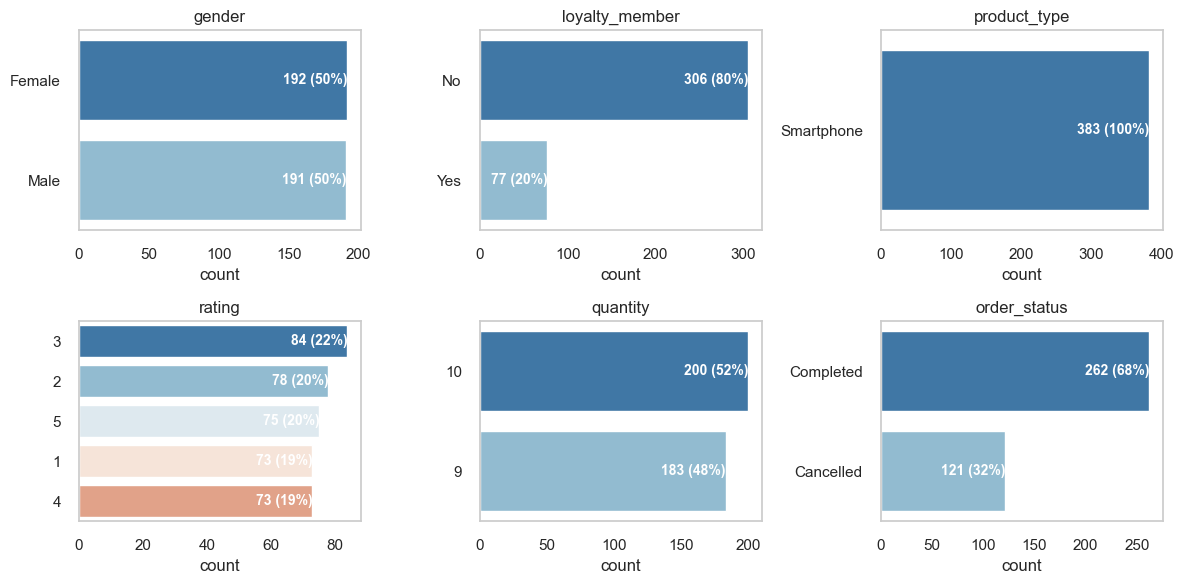

In [471]:
# Create mask based on conditions total_price outliers only
total_price_outlier_mask = (df['outliers'] == 1) & (df['total_price'] > 9889.48)

# Apply the mask
data = df[total_price_outlier_mask]

# Define columns
columns = ['gender', 'loyalty_member', 'product_type',
       'rating', 'quantity', 'order_status']

# Set the number of columns per row
columns_per_row = 3

# Calculate the number of rows needed
num_rows = len(columns) // columns_per_row + (len(columns) % columns_per_row > 0)

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(12, 6))

# Loop through the columns and create countplots with percentages
for i, col in enumerate(columns):
    row = i // columns_per_row
    col_index = i % columns_per_row
    ax = axes[row, col_index]

    # Create the countplot
    sns.countplot(y=data[col], ax=ax, palette=palette_r,
                 order=data[col].value_counts(ascending=False).index)

    # Get the counts for labeling
    counts = data[col].value_counts(ascending=False).values
    total = data.shape[0]

    # Calculate percentages
    percentages = ((counts / total) * 100).round(2)

    # Create labels with percentages
    labels = [f"{value} ({percentage:.0f}%)" for value, percentage in zip(counts, percentages)]

    # Label bars with percentages (adjust vertical offset as needed)
    for j, (patch, label) in enumerate(zip(ax.patches, labels)):
        ax.text(patch.get_width() + 0.2, patch.get_y() + patch.get_height() / 2,
                label, ha='right', va='center', fontweight='bold', fontsize=10, color='white')

    ax.set_title(col)
    ax.grid(False)
    ax.set_ylabel('')  # Remove default y-axis label (optional)

# Hide the last subplot
# axes.flatten()[-1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Key insights for `total_price` outliers 

1. over $9889 in total

2. all from smartphone `product_type`

3. large `quantity` of 9+

Comments

- Realistically, a regular customers would rarely purchase 9-10 smartphones in a single order unless it's for resale purposes or an error occurred

- This group of customers could be separated considered resalers group


### 3.4.3 Separate Resalers

1. Here we'll separate outliers from `total_price` from the original dataset and identify them as **Resale Group**
2. for now we'll postpone treatment of add on outliers 

In [472]:
# customer_ids_in_resale = data['customer_id']
# customer_ids_in_resale

In [473]:
# df_resale = df.copy()
# df_resale = df_resale[df_resale['customer_id'].isin(customer_ids_in_resale)]
# df_resale


In [474]:
# # remove the total_price outliers from the dataset and save as new dataframe
# df = df[~customer_ids_in_resale]
# # df = df.drop('outliers',axis=1)
# df.shape

# 4. Data Visualization

- Demographic: `Age`, `Gender`

- Product: `Product_Type`, `SKU`, `Unit_Price`
- Behavioral: `Loyalty_Member`, `Rating`, `Order_Status`, `Payment_Method`, `Shipping_Type`,`Accessory`, `Impulse_Item`, `Extended_Warranty`, `Add_Ons_Count`

- RFM: 
    - Recency (how recently a customer has made a purchase.) = `Purchase_Date`
    - Frequency (how often a customer has made purchases.) = `Quantity`
    - Monetary (total amount of money a customer has spent) =  `Total_Price`, `Add_on_Total`,


## 4.1 Demographic Features 

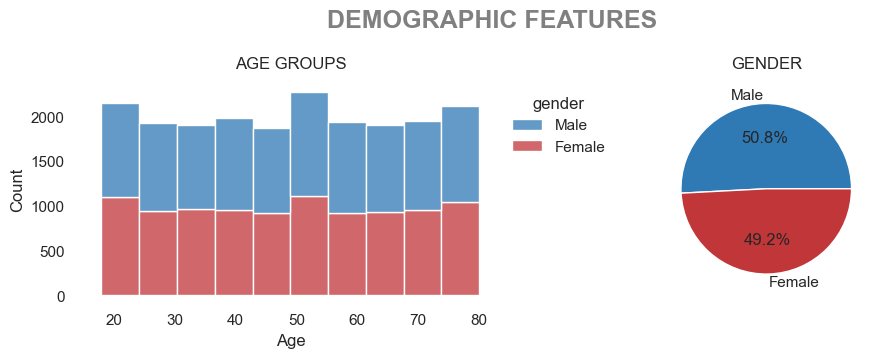

In [475]:
plt.figure(figsize=(10,6))
plt.suptitle('DEMOGRAPHIC FEATURES', fontsize=18, fontweight='bold',color='grey')

# Plot Age Histogram
plt.subplot(2,2,1)
ax = sns.histplot(data=df, x='age', hue='gender', multiple='stack', bins=10,palette=palette2)
plt.title('AGE GROUPS', pad=10)
plt.xlabel('Age')
plt.ylabel('Count')

plt.grid(False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend location
sns.despine(left=True, bottom=True) # Remove borders borders

# Pie chart of gender
plt.subplot(2,2,2)
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=palette2)
plt.title('GENDER', pad=10)


plt.tight_layout()

`Age` : uniformly distributed

`Gender` : almost equal distribution, 50.8% male,  49.2% female

## 4.2 Product Features 

Group SKU by Project Type

In [476]:
df.groupby(by=['product_type','sku']).size().reset_index()

product_type      sku     0
0    Headphones   HDP456  2010
1    Headphones  SKU1003     1
2        Laptop   LTP123  1961
3        Laptop  SKU1004     1
4        Laptop  SKU1005  2011
5    Smartphone  SKU1001  1972
6    Smartphone  SKU1004  2018
7    Smartphone  SKU1005     1
8    Smartphone   SMP234  1987
9    Smartwatch  SKU1003  1954
10   Smartwatch   SWT567  1980
11       Tablet  SKU1002  2042
12       Tablet   TBL345  2062

**Clean data entry errors**

Potential data entry errors where some SKUs have the wrong Product_Type label. For example, SKU1003, SKU1004, and SKU1005 all have 1 row with a different Product_Type label compared to the rest. Therefore, it's safe to assume these are mislabeled and can be corrected.


- SKU1003 --> Smartwatch      
- SKU1004 --> Smartphone    
- SKU1005 --> Laptop            

In [477]:
# Replace values in Product_Type where SKU is "SKU1004"
df.loc[df['sku'] == 'SKU1003', 'product_type'] = 'Smartwatch'
df.loc[df['sku'] == 'SKU1004', 'product_type'] = 'Smartphone'
df.loc[df['sku'] == 'SKU1005', 'product_type'] = 'Laptop'

In [478]:
# Group by Product_Type and SKU, count the occurrences, and reset the index
df_product = df.groupby(['product_type', 'sku']).size().reset_index(name='Count')
df_product 


product_type      sku  Count
0   Headphones   HDP456   2010
1       Laptop   LTP123   1961
2       Laptop  SKU1005   2012
3   Smartphone  SKU1001   1972
4   Smartphone  SKU1004   2019
5   Smartphone   SMP234   1987
6   Smartwatch  SKU1003   1955
7   Smartwatch   SWT567   1980
8       Tablet  SKU1002   2042
9       Tablet   TBL345   2062

In [479]:
import plotly.express as px

data = px.data.tips()
fig = px.sunburst(df_product, 
                  path=['product_type', 'sku'], 
                  values='Count',
                  color_continuous_scale='RdBu',
                  color='Count')
fig.show()

## 4.3 Behavioral Features

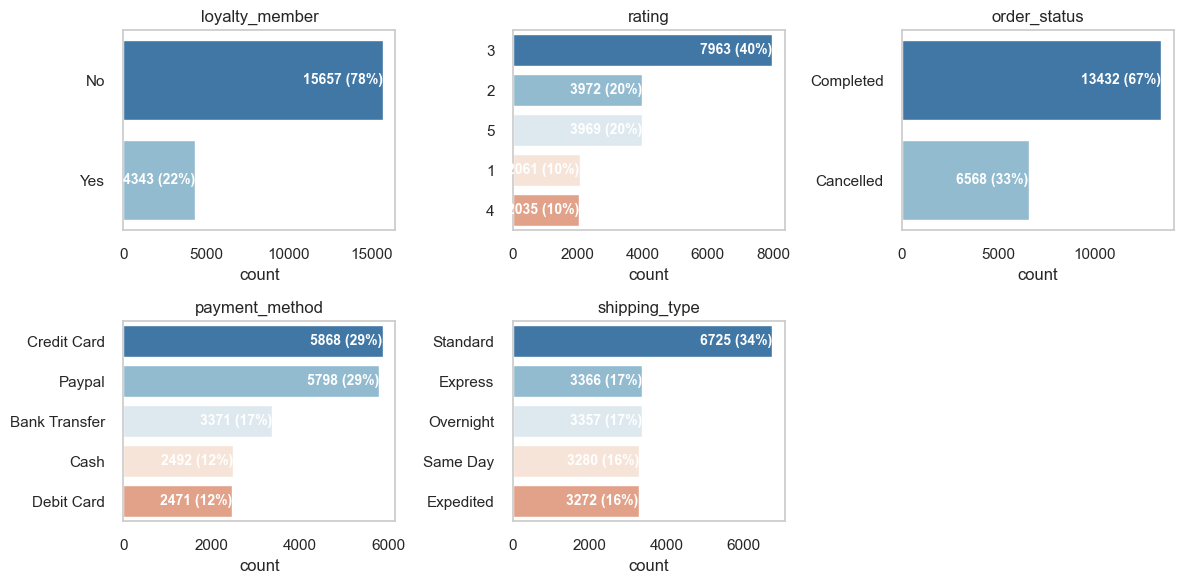

In [480]:

# Define columns
columns = ['loyalty_member', 'rating', 'order_status', 'payment_method', 'shipping_type']

# Set the number of columns per row
columns_per_row = 3

# Calculate the number of rows needed
num_rows = len(columns) // columns_per_row + (len(columns) % columns_per_row > 0)

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(12, 6))

# Loop through the columns and create countplots with percentages
for i, col in enumerate(columns):
    row = i // columns_per_row
    col_index = i % columns_per_row
    ax = axes[row, col_index]

    # Create the countplot
    sns.countplot(y=df[col], ax=ax, palette=palette_r,
                 order=df[col].value_counts(ascending=False).index)

    # Get the counts for labeling
    counts = df[col].value_counts(ascending=False).values
    total = df.shape[0]

    # Calculate percentages
    percentages = ((counts / total) * 100).round(2)

    # Create labels with percentages
    labels = [f"{value} ({percentage:.0f}%)" for value, percentage in zip(counts, percentages)]

    # Label bars with percentages (adjust vertical offset as needed)
    for j, (patch, label) in enumerate(zip(ax.patches, labels)):
        ax.text(patch.get_width() + 0.2, patch.get_y() + patch.get_height() / 2,
                label, ha='right', va='center', fontweight='bold', fontsize=10, color='white')

    ax.set_title(col)
    ax.grid(False)
    ax.set_ylabel('')  # Remove default y-axis label (optional)

# Hide the last subplot
axes.flatten()[-1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

`order_status`
- over 6400 purchases were cancelled

# 5. Feature Engineering


## 5.1 Repurchases

Check if there has been repurchases from same customer

In [481]:
repurchases = df['customer_id'].value_counts()[df['customer_id'].value_counts() > 1]

print('No. of customers with multiple purchases:',repurchases.shape[0])
print(repurchases.head(5))

No. of customers with multiple purchases: 5499
customer_id
18304    8
16357    7
12276    6
14497    6
7070     6
Name: count, dtype: int64


## 5.2 RFM (Recency, Frequency, Monetary)

RFM is a basic customer segmentation algorithm based on their purchasing behavior. The behavior is identified by using only three customer data points:

This analysis is a customer segmentation technique used in marketing to identify and categorize customers based on their recent activity, frequency of purchases, and monetary value spent. 

In our case these have been defined with existing features.

- Recency (how recently a customer has made a purchase.) = most_recent_date - purchase_date
- Frequency (how often a customer has made purchases.) = `quantity`
- Monetary (total amount of money a customer has spent) = `total_price` 

Since our approach is behaviroal segmentation based on rfm features. we can create a new dataframe with just the relevant features.


### 5.2.1 Recency

In [482]:
df_customer = df.copy()

# Find the most recent date in the entire dataset
latest_date = df_customer['purchase_date'].max()

# Calculate the number of days since the last purchase for each customer
df_customer['recency'] = (latest_date - df['purchase_date']).dt.days

# Find the most recent purchase date for each customer
df_customer = df_customer.groupby('customer_id')['recency'].max().reset_index()
df_customer.head()

customer_id  recency
0         1000      187
1         1002      342
2         1003      125
3         1004      120
4         1005      237

### 5.2.2 Frequency


In this step, I am going to create two features that quantify the frequency of a customer's engagement with the retailer:

- **Total Orders**: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the retailer.


- **Total Quantity**: This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.

    
These features will be crucial in segmenting customers based on their buying frequency, which is a key aspect in determining customer segments for targeted marketing and personalized recommendations.

In [483]:
# Calculate the total number of orders made by each customer
total_orders = df.groupby('customer_id')['sku'].nunique().reset_index()
total_orders.rename(columns={'sku': 'total_orders'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_qty = df.groupby('customer_id')['quantity'].sum().reset_index()
total_qty.rename(columns={'quantity': 'total_qty'}, inplace=True)

# Merge the new features into the customer_data dataframe
df_customer = pd.merge(df_customer, total_orders, on='customer_id')
df_customer = pd.merge(df_customer, total_qty, on='customer_id')

# Display the first few rows of the customer_data dataframe
df_customer.head()

customer_id  recency  total_orders  total_qty
0         1000      187             2         10
1         1002      342             2          8
2         1003      125             1          2
3         1004      120             1          4
4         1005      237             2         18

### 5.2.3 Monetary

In this step, I am going to create two features that represent the monetary aspect of customer's transactions:

- __Total Spend__: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of `UnitPrice` and `Quantity` for all transactions made by a customer. This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.

    
- __Average Transaction Value__: This feature is calculated as the __Total Spend__ divided by the __Total Transactions__ for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [484]:
# Calculate the total spend by each customer
total_spend = df.groupby('customer_id')['total_price'].sum().reset_index()
total_spend.rename(columns={'total_price': 'total_spend'}, inplace=True)

# Calculate the average transaction value for each customer
average_spend = total_spend.merge(total_orders, on='customer_id')
average_spend['avg_spend'] = average_spend['total_spend'] / average_spend['total_orders']

# Merge the new features into the customer_data dataframe
df_customer = pd.merge(df_customer, total_spend, on='customer_id')
df_customer = pd.merge(df_customer, average_spend[['customer_id', 'avg_spend']], on='customer_id')

# Display the first few rows of the customer_data dataframe
df_customer.head()

customer_id  recency  total_orders  total_qty  total_spend  avg_spend
0         1000      187             2         10      6279.42   3139.710
1         1002      342             2          8      5020.60   2510.300
2         1003      125             1          2        41.50     41.500
3         1004      120             1          4        83.00     83.000
4         1005      237             2         18     11779.11   5889.555

## 5.3 Behavioural Features

preferred for shipping methods, payment types, product ratings

### 5.3.1 Average Product Rating

In [485]:
# Calculate the total spend by each customer
average_rating = round(df.groupby('customer_id')['rating'].mean().reset_index(),1)
average_rating.rename(columns={'rating': 'avg_rating'}, inplace=True)
average_rating

# Merge the data into the customer_data dataframe
df_customer = pd.merge(df_customer, average_rating[['customer_id','avg_rating']], on='customer_id')
df_customer.head()

customer_id  recency  total_orders  total_qty  total_spend  avg_spend  \
0         1000      187             2         10      6279.42   3139.710   
1         1002      342             2          8      5020.60   2510.300   
2         1003      125             1          2        41.50     41.500   
3         1004      120             1          4        83.00     83.000   
4         1005      237             2         18     11779.11   5889.555   

   avg_rating  
0         2.5  
1         2.5  
2         5.0  
3         5.0  
4         3.0

### 5.3.2 Loyalty Member

Previously, we confirmed if there has been repurchases from same customers.

In [486]:
repurchases.head()

customer_id
18304    8
16357    7
12276    6
14497    6
7070     6
Name: count, dtype: int64

Let's check the `loyalty_member` of these customers to see if they are consistent

In [487]:
# Filter the DataFrame by customer ID
filtered_df = df[(df['customer_id'] == 18304) | (df['customer_id'] == 12276)]
filtered_df[['customer_id','age','gender','loyalty_member','purchase_date']]

customer_id  age  gender loyalty_member purchase_date
11515        12276   52    Male            Yes    2024-03-22
11516        12276   52    Male             No    2024-05-25
11517        12276   52    Male            Yes    2024-07-16
11518        12276   52    Male             No    2024-08-11
11519        12276   52    Male             No    2024-08-15
11520        12276   52    Male            Yes    2024-08-16
18096        18304   33  Female            Yes    2024-01-18
18097        18304   33  Female             No    2024-03-08
18098        18304   33  Female             No    2024-04-04
18099        18304   33  Female             No    2024-05-13
18100        18304   33  Female             No    2024-05-26
18101        18304   33  Female             No    2024-07-29
18102        18304   33  Female            Yes    2024-08-10
18103        18304   33  Female             No    2024-09-16

Since the dataset is synthetic and the `gender` and `loyalty` has been adjusted for a more realistic distribution. There are inconsistencies in the loyalty during the adjustment. I'll reassign the loyalty member based on the first purchase's information. 

In [488]:
# Sort the DataFrame by 'customer_id' and 'purchase_date'
df.sort_values(['customer_id', 'purchase_date'], inplace=True)

# Group the DataFrame by 'customer_id' and take the first value of 'loyalty_member' for each group
df['loyalty_member'] = df.groupby('customer_id')['loyalty_member'].transform('first')

# Check loyalty_member of customer with inconsistent membership
df[df['customer_id']==12276]

customer_id  age gender loyalty_member product_type     sku  rating  \
11515        12276   52   Male            Yes   Smartwatch  SWT567       3   
11516        12276   52   Male            Yes   Smartphone  SMP234       5   
11517        12276   52   Male            Yes       Tablet  TBL345       4   
11518        12276   52   Male            Yes   Headphones  HDP456       2   
11519        12276   52   Male            Yes   Headphones  HDP456       3   
11520        12276   52   Male            Yes   Smartphone  SMP234       5   

      order_status payment_method  total_price  unit_price  quantity  \
11515    Cancelled  Bank Transfer      1378.50      459.50         3   
11516    Cancelled  Bank Transfer      9117.44     1139.68         8   
11517    Completed    Credit Card      6291.28      786.41         8   
11518    Completed    Credit Card      1805.90      361.18         5   
11519    Completed  Bank Transfer      3250.62      361.18         9   
11520    Completed         Paypal      9117.44     1139.68         8   

      purchase_date shipping_type  outliers  
11515    2024-03-22      Same Day         0  
11516    2024-05-25      Same Day         0  
11517    2024-07-16      Same Day         0  
11518    2024-08-11     Expedited         0  
11519    2024-08-15     Expedited         0  
11520    2024-08-16      Standard         0

Let's encode loyalty_member and add it to the customer dataset

In [489]:
# Create a new dataset
loyalty = df[['customer_id','loyalty_member']]

# One-hot encode the 'category' column
loyalty['loyalty_member'] = pd.Categorical(loyalty['loyalty_member']).codes

loyalty = loyalty.groupby('customer_id')['loyalty_member'].mean().astype(int).reset_index()


# Merge the data into the customer_data dataframe
df_customer = pd.merge(df_customer, loyalty, on='customer_id')
df_customer.head(6)

customer_id  recency  total_orders  total_qty  total_spend    avg_spend  \
0         1000      187             2         10      6279.42  3139.710000   
1         1002      342             2          8      5020.60  2510.300000   
2         1003      125             1          2        41.50    41.500000   
3         1004      120             1          4        83.00    83.000000   
4         1005      237             2         18     11779.11  5889.555000   
5         1006      356             3         26     12184.27  4061.423333   

   avg_rating  loyalty_member  
0         2.5               0  
1         2.5               0  
2         5.0               1  
3         5.0               0  
4         3.0               0  
5         2.7               0

## 5.4 Demographic Features

### 5.4.1 Age Group

Age Range |	Label | Group
---- | --- | --- |
18–24 | Young Adult | 0
25–34 | Young Professional | 1  
35–44 | Established Professional |2
45–54 | Mid-Career |3
55–64 | Pre-Retirement | 4
65+	| Retired | 5

In [490]:
age = df.groupby('customer_id')['age'].mean().reset_index()

# Define the age bins and labels
age_bins = [17, 24, 34, 44, 54, 64, 84]
age_label = ['Young Adult', 'Young Professional', 'Established Professional', 'Mid-Career', 'Pre-Retirement', 'Retired']
age_group = ['0','1','2','3','4','5']

# Create a new 'age_group' column using pd.cut
age['age_label'] = pd.cut(age['age'], bins=age_bins, labels=age_label)
age['age_group'] = pd.cut(age['age'], bins=age_bins, labels=age_group).astype(int)

# merge the age_group to customer dataset
df_customer = pd.merge(df_customer, age[['customer_id', 'age_group']], on='customer_id')
df_customer.head(6)

customer_id  recency  total_orders  total_qty  total_spend    avg_spend  \
0         1000      187             2         10      6279.42  3139.710000   
1         1002      342             2          8      5020.60  2510.300000   
2         1003      125             1          2        41.50    41.500000   
3         1004      120             1          4        83.00    83.000000   
4         1005      237             2         18     11779.11  5889.555000   
5         1006      356             3         26     12184.27  4061.423333   

   avg_rating  loyalty_member  age_group  
0         2.5               0          3  
1         2.5               0          2  
2         5.0               1          5  
3         5.0               0          2  
4         3.0               0          1  
5         2.7               0          0

<Axes: xlabel='age_group', ylabel='count'>

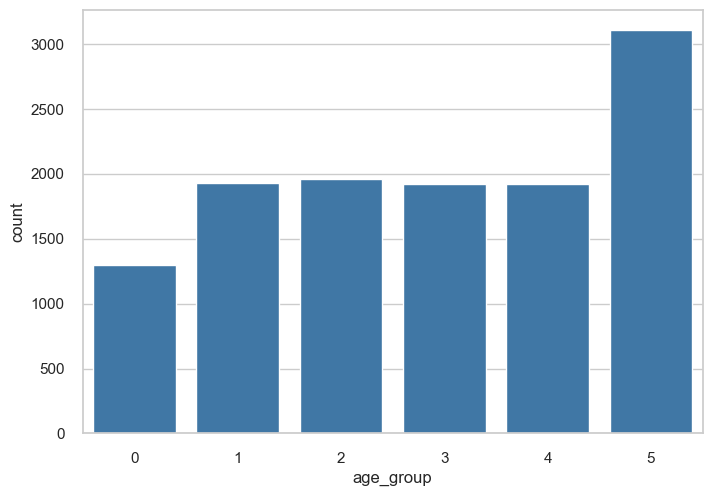

In [491]:
sns.countplot(df_customer,x='age_group')

### 5.4.2 Gender

In [492]:
# Filter the DataFrame by customer ID
gender = df[['customer_id','gender']]

# One-hot encode the 'category' column
gender['gender_code'] = pd.Categorical(gender['gender']).codes
gender = gender.groupby('customer_id')['gender_code'].mean().astype(int).reset_index()


# merge the age_group to customer dataset
df_customer = pd.merge(df_customer, gender, on='customer_id')
df_customer.head(6)

customer_id  recency  total_orders  total_qty  total_spend    avg_spend  \
0         1000      187             2         10      6279.42  3139.710000   
1         1002      342             2          8      5020.60  2510.300000   
2         1003      125             1          2        41.50    41.500000   
3         1004      120             1          4        83.00    83.000000   
4         1005      237             2         18     11779.11  5889.555000   
5         1006      356             3         26     12184.27  4061.423333   

   avg_rating  loyalty_member  age_group  gender_code  
0         2.5               0          3            1  
1         2.5               0          2            1  
2         5.0               1          5            1  
3         5.0               0          2            0  
4         3.0               0          1            0  
5         2.7               0          0            1

### 5.4.3 Product Intersts 

In this step, we are going to understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. Here, I am going to define the following feature:

- **unique_sku**: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.

In [493]:
# Calculate the number of unique products purchased by each customer
sku_count = df.groupby('customer_id')[['sku']].nunique().reset_index()
sku_count.rename(columns={'sku': 'unique_sku'}, inplace=True)
sku_count

# Merge the new feature into the customer_data dataframe
df_customer = pd.merge(df_customer, sku_count, on='customer_id')

# Display the first few rows of the customer_data dataframe
df_customer.head(6)

customer_id  recency  total_orders  total_qty  total_spend    avg_spend  \
0         1000      187             2         10      6279.42  3139.710000   
1         1002      342             2          8      5020.60  2510.300000   
2         1003      125             1          2        41.50    41.500000   
3         1004      120             1          4        83.00    83.000000   
4         1005      237             2         18     11779.11  5889.555000   
5         1006      356             3         26     12184.27  4061.423333   

   avg_rating  loyalty_member  age_group  gender_code  unique_sku  
0         2.5               0          3            1           2  
1         2.5               0          2            1           2  
2         5.0               1          5            1           1  
3         5.0               0          2            0           1  
4         3.0               0          1            0           2  
5         2.7               0          0            1           3

## 5.5 Cancellations


In this step, I am going to delve deeper into the cancellation patterns of customers to gain insights that can enhance our customer segmentation model. The features I am planning to introduce are:

- __Cancellation Frequency__: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

    
- __Cancellation Rate__: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.

By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.


In [494]:
# Calculate the total number of transactions made by each customer
total_orders = df.groupby('customer_id')['sku'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['order_status'] == 'Cancelled']
cancel_rate = round((cancelled_transactions.groupby('customer_id')['sku'].nunique().reset_index()),2)
cancel_rate.rename(columns={'sku': 'cancel_rate'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
df_customer = pd.merge(df_customer, cancel_rate, on='customer_id', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
df_customer['cancel_rate'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
df_customer['cancel_rate'] = df_customer['cancel_rate'] / total_orders['sku']

# Display the first few rows of the customer_data dataframe
df_customer.head()

customer_id  recency  total_orders  total_qty  total_spend  avg_spend  \
0         1000      187             2         10      6279.42   3139.710   
1         1002      342             2          8      5020.60   2510.300   
2         1003      125             1          2        41.50     41.500   
3         1004      120             1          4        83.00     83.000   
4         1005      237             2         18     11779.11   5889.555   

   avg_rating  loyalty_member  age_group  gender_code  unique_sku  cancel_rate  
0         2.5               0          3            1           2          0.5  
1         2.5               0          2            1           2          0.0  
2         5.0               1          5            1           1          0.0  
3         5.0               0          2            0           1          0.0  
4         3.0               0          1            0           2          0.0

### 5.5.1 Plot Cancellations

6568


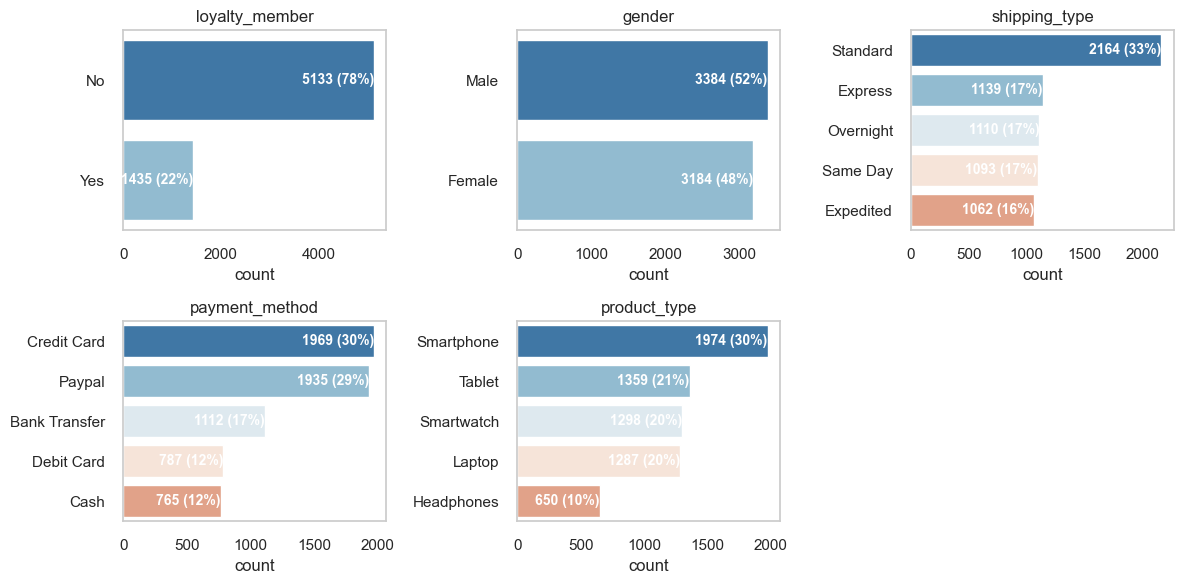

In [495]:
# Create mask based on conditions for variable of interest 
cancel_mask = (df['order_status'] == "Cancelled")

# Apply the mask
df_cancelled = df[cancel_mask]
print(df_cancelled.shape[0])

# Define columns
columns = ['loyalty_member','gender','shipping_type','payment_method','product_type']

# Set the number of columns per row
columns_per_row = 3

# Calculate the number of rows needed
num_rows = len(columns) // columns_per_row + (len(columns) % columns_per_row > 0)


# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(12, 6))

# Loop through the columns and create countplots with percentages
for i, col in enumerate(columns):
    row = i // columns_per_row
    col_index = i % columns_per_row
    ax = axes[row, col_index]

    # Create the countplot
    sns.countplot(y=df_cancelled[col], ax=ax, palette=palette_r,
                 order=df_cancelled[col].value_counts(ascending=False).index)

    # Get the counts for labeling
    counts = df_cancelled[col].value_counts(ascending=False).values
    total = df_cancelled.shape[0]

    # Calculate percentages
    percentages = ((counts / total) * 100).round(2)

    # Create labels with percentages
    labels = [f"{value} ({percentage:.0f}%)" for value, percentage in zip(counts, percentages)]

    # Label bars with percentages (adjust vertical offset as needed)
    for j, (patch, label) in enumerate(zip(ax.patches, labels)):
        ax.text(patch.get_width() + 0.2, patch.get_y() + patch.get_height() / 2,
                label, ha='right', va='center', fontweight='bold', fontsize=10, color='white')

    ax.set_title(col)
    ax.grid(False)
    ax.set_ylabel('')  # Remove default y-axis label (optional)

# Hide the last subplot
axes.flatten()[-1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Of the 6568 order cancellations,

- 78% were not `loyalty_members` 
- 30% were from smartphone `product_type`
- 40% has 3 star `rating`
- 30% with credit card `payment_method`
- 33% with standard `shipping_type`

**Actions**
- look into options to convert non members to members to reduce cancellations


## 5.6 Outlier Treatment


In this section, I will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the __Isolation Forest__ algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:

In [496]:
from sklearn.ensemble import IsolationForest

# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
df_customer['outlier_scores'] = model.fit_predict(df_customer.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
df_customer['outliers'] = [1 if x == -1 else 0 for x in df_customer['outlier_scores']]

# Display the first few rows of the customer_data dataframe
df_customer.head(6)

customer_id  recency  total_orders  total_qty  total_spend    avg_spend  \
0         1000      187             2         10      6279.42  3139.710000   
1         1002      342             2          8      5020.60  2510.300000   
2         1003      125             1          2        41.50    41.500000   
3         1004      120             1          4        83.00    83.000000   
4         1005      237             2         18     11779.11  5889.555000   
5         1006      356             3         26     12184.27  4061.423333   

   avg_rating  loyalty_member  age_group  gender_code  unique_sku  \
0         2.5               0          3            1           2   
1         2.5               0          2            1           2   
2         5.0               1          5            1           1   
3         5.0               0          2            0           1   
4         3.0               0          1            0           2   
5         2.7               0          0            1           3   

   cancel_rate  outlier_scores  outliers  
0     0.500000               1         0  
1     0.000000               1         0  
2     0.000000               1         0  
3     0.000000               1         0  
4     0.000000               1         0  
5     0.333333              -1         1

### 5.6.1 Plot

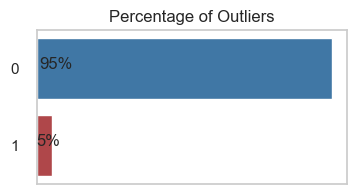

In [497]:
# Calculate the percentage of inliers and outliers
outlier_percentage = df_customer['outliers'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(4, 2))
ax = sns.countplot(df_customer, y='outliers',palette=palette2)

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.0f}%',ha='left')

plt.title('Percentage of Outliers')
ax.set_xticklabels([])
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.show()

Strategy: 

Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis. 

Let's proceed with the following steps:

- Separate the identified outliers for further analysis and save them as a separate file (optional).
- Remove the outliers from the main dataset to prevent them from influencing the clustering process.
- Drop the `Outlier_Scores` and `Is_Outlier` columns as they were auxiliary columns used for the outlier detection process.

Let's implement these steps:

In [498]:
# Separate the outliers for analysis
outliers_data = df_customer[df_customer['outliers'] == 1]

# Remove the outliers from the main dataset
df_customer = df_customer[df_customer['outliers'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
df_customer = df_customer.drop(columns=['outlier_scores', 'outliers'])

# Reset the index of the cleaned data
df_customer.reset_index(drop=True, inplace=True)

# 6. Feature Scaling


To ensure that all features contribute equally to the model and to uncover the true patterns in the data, I'll standardize our data. This means transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features need scaling. Here are the exceptions and why they're excluded:


In [499]:
# Initialize the Scaler
scaler = StandardScaler()

df_customer_scaled = df_customer.copy()

columns = ['age_group','recency','total_orders','avg_spend','total_qty','total_spend','unique_sku','cancel_rate','avg_rating']

# Applying the scaler to the necessary columns in the dataset
df_customer_scaled[columns] = scaler.fit_transform(df_customer_scaled[columns])

# Display the first few rows of the scaled data


df_customer_scaled.set_index('customer_id', inplace=True)
df_customer_scaled.head()

recency  total_orders  total_qty  total_spend  avg_spend  \
customer_id                                                              
1000         0.031753      0.973705   0.314663     0.403090  -0.098272   
1002         1.668870      0.973705  -0.075313     0.064598  -0.353317   
1003        -0.623094     -0.707314  -1.245240    -1.274263  -1.353704   
1004        -0.675904     -0.707314  -0.855264    -1.263103  -1.336888   
1005         0.559855      0.973705   1.874566     1.881935   1.015998   

             avg_rating  loyalty_member  age_group  gender_code  unique_sku  \
customer_id                                                                   
1000          -0.567915               0   0.066166            1    0.973705   
1002          -0.567915               0  -0.521979            1    0.973705   
1003           1.793209               1   1.242455            1   -0.707314   
1004           1.793209               0  -0.521979            0   -0.707314   
1005          -0.095690               0  -1.110124            0    0.973705   

             cancel_rate  
customer_id               
1000            0.358615  
1002           -0.809975  
1003           -0.809975  
1004           -0.809975  
1005           -0.809975

# 7. Correlation Analysis

Correlation analysis is a valuable preprocessing step before applying K-means clustering to ensure the effectiveness and accuracy of the clustering results. Here's why:

1. Improve data quality: by removing **redundant** features and addressing **multicollinearity**.
2. Enhance model performance: by **reducing dimensionality** and improving interpretability.
3. Ensure accurate clustering results: by ensuring that features are **scaled** appropriately and that the model is not **overfitting**.

- correlation coefficient method
    - pearson :  assesses **linear** relationships
    - kendall :  assesses the **ordinal** relationships  
    - spearman : assesses monotonic relationships (whether **linear or not**), appropriate for both **continuous** and **discrete ordinal** variables

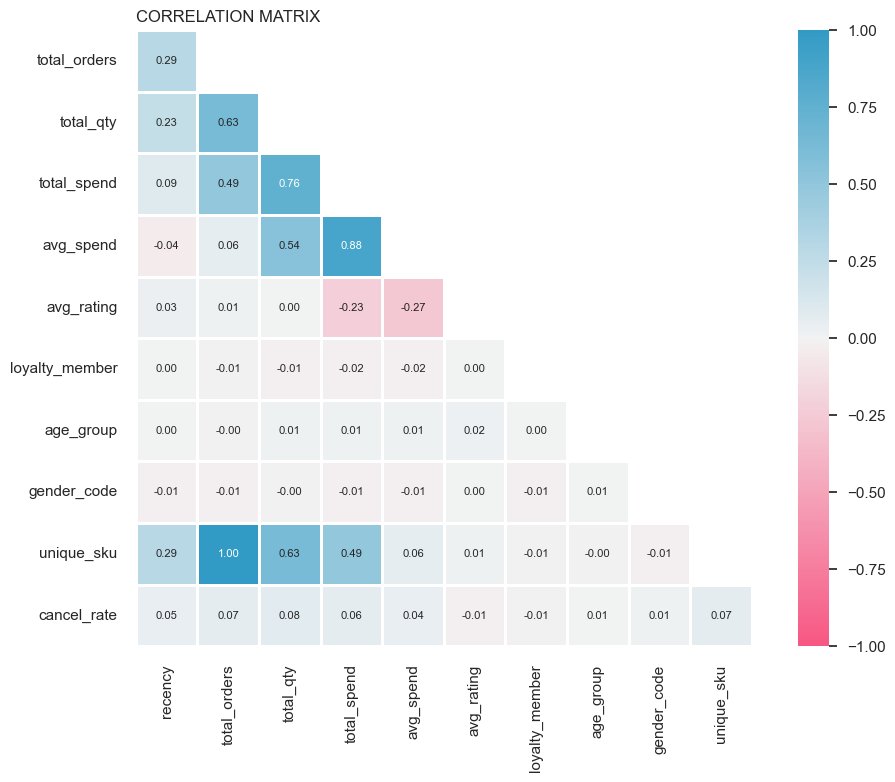

In [500]:
# Create heatmap to check correlation between variables
plt.figure(figsize=(12, 8))

df_corr = df_customer_scaled.corr(method='spearman')

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


sns.heatmap(corr, 
            square=True, 
            fmt=".2f", 
            annot=True,
            annot_kws={'size': 8},
            vmin = -1, 
            vmax = 1,            
            cmap=cmap,
            mask=mask,
            linewidths=1)

plt.grid(False)
# title
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=12)

# Display plot
plt.show()

## Multicollinearity

Multicollinearity occurs when two or more independent variables are highly correlated with each other. This can make it difficult to accurately estimate the individual effects of these variables.

multicollineartiy is present the dataset from the heatmap.

Positive correlation
- 0.64: `total_price` and `quantity`: which makes sense as total price is calculated from sum of `unit_price` and `quantity`

# 8. PCA Dimensionality Reduction

Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset while preserving the most important information. It transforms a large number of correlated variables into a smaller number of uncorrelated variables called principal components. These components capture the maximum variance in the data

PCA is primarily used to:
- **Reduce dimensionality**: Simplify complex datasets with numerous correlated variables.
- **Improve model performance**: PCA can help prevent overfitting by reducing the number of features.
- **Visualize data:** PCA can help visualize high-dimensional data in a lower-dimensional space.

Disadvantages:
- Loss of interpretability: The new principal components are linear combinations of the original features, making them harder to interpret.
- Assumption of linearity: PCA assumes that the data is linearly related, which might not always be the case.
- Sensitivity to scaling: PCA is sensitive to the scaling of the original features. Scaling the data before applying PCA is essential.
- Potential for information loss: While PCA can reduce dimensionality effectively, it might also lead to some loss of information.

## 8.1 Determining the Right Number of Components

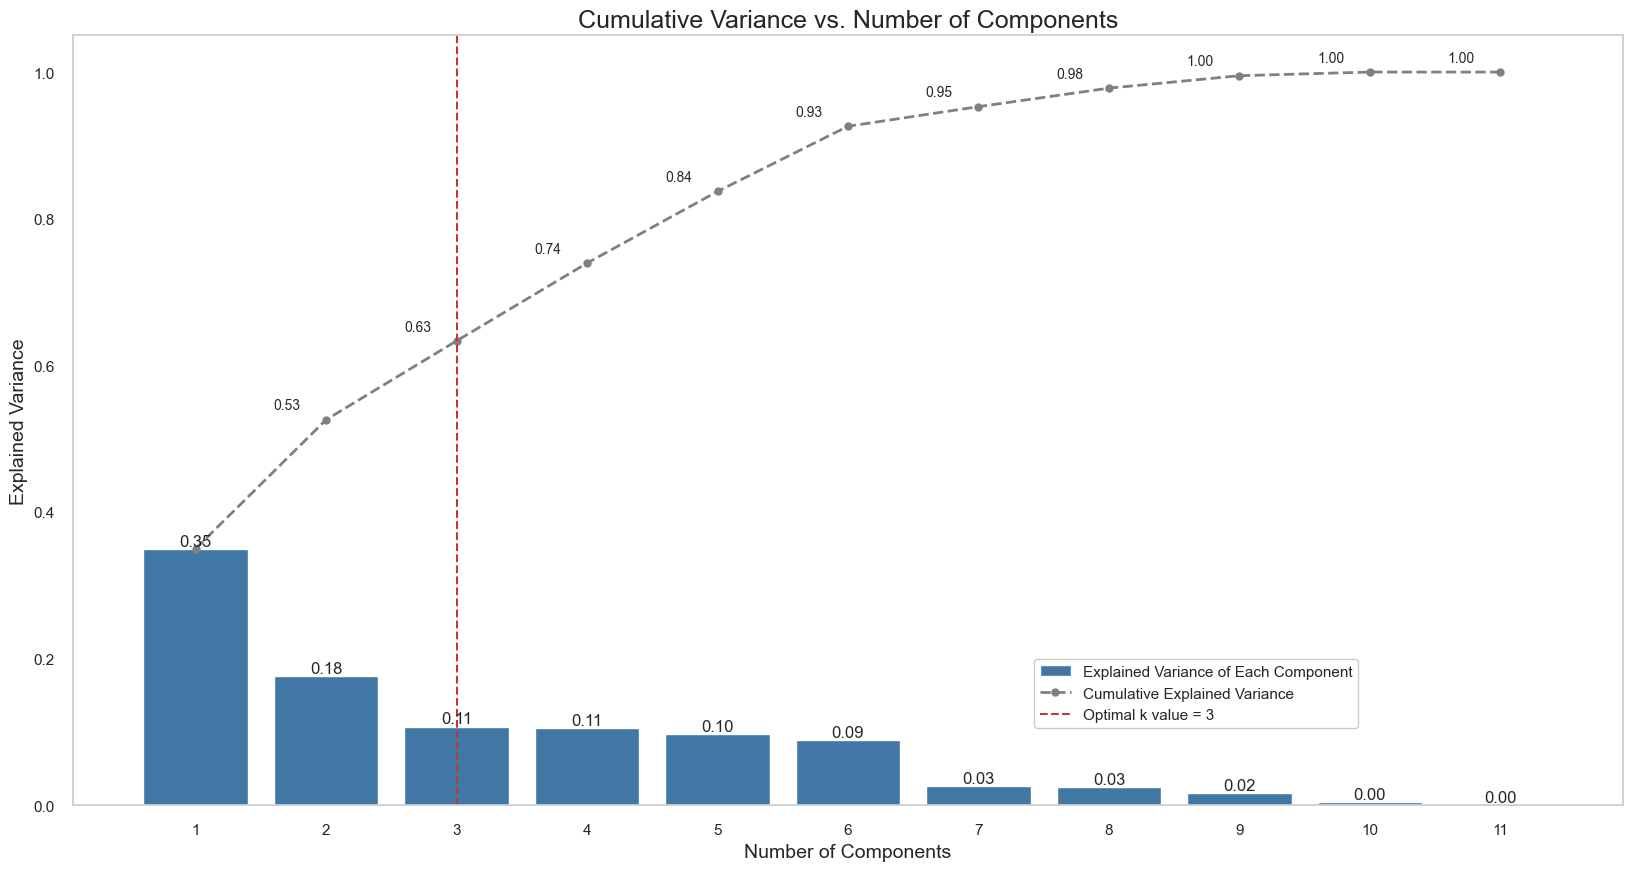

In [507]:
# Fit PCA on scaled data
pca = PCA().fit(df_customer_scaled)


# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# set threshold where minimual numner of components capture 70 of total variance
threshold = 0.70

# Get the first index exceeding the threshold
optimal_k = np.where(cumulative_explained_variance > threshold)[0][0] 

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='grey', linewidth=2)

# Line plot for the optimal k
optimal_k_line = plt.axvline(optimal_k - 1, color='#c13639', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0)  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom")
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(False)   

plt.show()

## 8.2 Applying PCA — Transforming Your Data

In [508]:
n_components=optimal_k

pca = PCA(n_components=n_components)

# Fitting and transforming the original data to the new PCA dataframe
pca_result = pca.fit_transform(df_customer_scaled)
pca_components = pca.components_

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
pca_result = pd.DataFrame(pca_result, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

pca_result.head()

PC1       PC2       PC3
0  1.270680 -0.393755  0.111546
1  1.137156 -1.275625 -0.884838
2 -2.458997 -1.341451  0.584897
3 -2.271374 -1.306545 -0.663019
4  3.069570  0.535302 -1.297899

In [509]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #c13639 ' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pca_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=df_customer_scaled.columns)

pca_df.style.apply(highlight_top3, axis=0)

**PC1: Purchasing Frequency/Monetary** 
- comprises of total_orders, total_qty, total_spend


**PC2: Product Interests**
- comprises of total_orders, avg_spend, unique_sku

**PC3: Purchasing Behavior**
- comprises of age_group,cancel_rate,avg_rating


# 9. Customer Segmentation with K-means Clustering

## 9.1 Determining Optimal Number of Clusters


To determine the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

* __Elbow Method__

* __Silhouette Method__
    
It's common to utilize both methods in practice to corroborate the results.

### 9.1.1 Elbow Method

The Elbow Method is used to determine the optimal number of clusters (K) in K-means clustering. It involves plotting the explained variance ratio or within-cluster sum of squares (WCSS) against the number of clusters.

- WCSS: This measures the sum of squared distances between each data point and its assigned cluster centroid.
- Explained variance ratio: This measures the proportion of variance explained by each principal component in PCA.

The "elbow" point in the plot typically indicates the optimal number of clusters. This is the point where the decrease in WCSS or increase in explained variance ratio starts to diminish significantly. Beyond this point, adding more clusters doesn't provide a significant reduction in WCSS or increase in explained variance ratio.

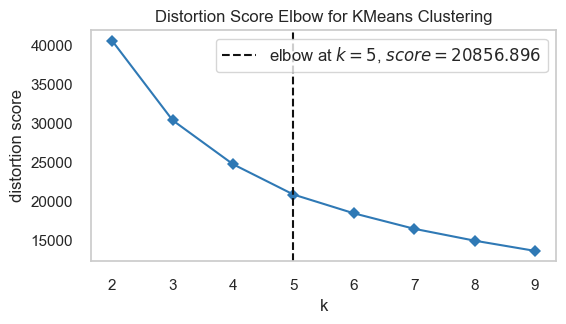

In [510]:
# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(6, 3))
plt.grid(False)

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 10), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(pca_result)
# visualizer.fit(df_scaled)

# Finalize and render the figure
visualizer.show();

### 9.1.2 Silhouette Method

The __Silhouette Method__ is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the __silhouette coefficient for each data point__, which measures how similar a point is to its own cluster compared to other clusters.

       
What are the Advantages of Silhouette Method over the Elbow Method?
    
* The __Silhouette Method__ evaluates cluster quality by considering __both__ the __cohesion within clusters__ and their __separation__ from other clusters. This provides a more comprehensive measure of clustering performance compared to the __Elbow Method__, which only considers the __inertia__ (sum of squared distances within clusters).


* The __Silhouette Method__ produces a silhouette score that directly quantifies the quality of clustering, making it easier to compare different values of k. In contrast, the __Elbow Method__ relies on the subjective interpretation of the elbow point, which can be less reliable in cases where the plot does not show a clear elbow.

    
* The __Silhouette Method__ generates a visual representation of silhouette coefficients for each data point, allowing for easier identification of fluctuations and outliers within clusters. This helps in determining the optimal number of clusters with higher confidence, as opposed to the __Elbow Method__, which relies on visual inspection of the inertia plot.

Methodology
    
In the following analysis:

- I will initially choose a range of 4-7 for the number of clusters (k) based on the Elbow method from the previous section. Next, I will plot __Silhouette scores__ for each k value to determine the one with the highest score.


- Subsequently, to fine-tune the selection of the most appropriate k, I will generate __Silhouette plots__ that visually display the __silhouette coefficients for each data point within various clusters__.


The __YellowBrick__ library will be utilized once again to create these plots and facilitate a comparative analysis.

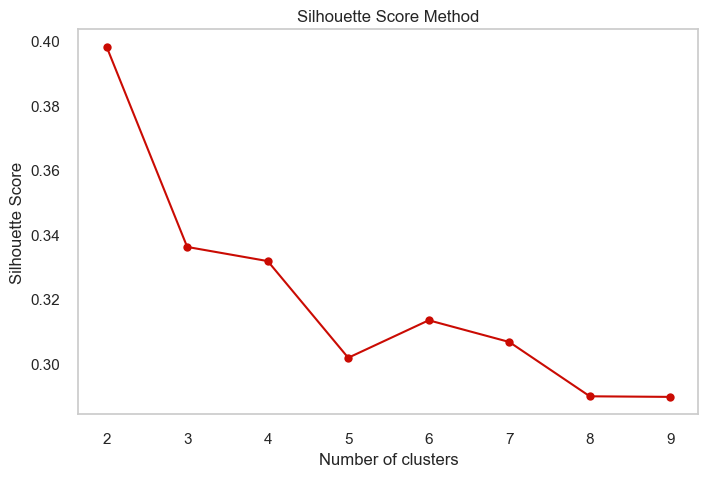

In [511]:
data = pca_result.copy()

silhouette_scores = []  # To store the silhouette score for each number of clusters
k_values = range(2, 10)  # Test values for k (number of clusters)

# Apply KMeans for each number of clusters (from 2 to 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    
    # Append silhouette score
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid(False)
plt.show()

## 9.2 Clustering Model Iterations

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

#### 9.2.1 Evaluation Metrics


To further scrutinize the quality of our clustering, I will employ the following metrics:

- __Silhouette Score__: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
    
    
- __Calinski Harabasz Score__: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.

    
- __Davies Bouldin Score__: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [512]:
n_clusters_range = [2, 3, 4, 5, 6]    # List of numbers of clusters for KMeans
results = [] # Create an empty list to store results from each combination of components and clusters
new_df_names = []
for n_clusters in n_clusters_range:

    data = pca_result.copy()

    # Apply KMeans clustering
    kmeans_pca = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100, random_state=0)
    kmeans_pca.fit(data)
    labels = kmeans_pca.labels_

    # Get the frequency of each cluster
    cluster_frequencies = Counter(labels)

    # Create a mapping from old labels to new labels based on frequency
    label_mapping = {label: new_label for new_label, (label, _) in 
                    enumerate(cluster_frequencies.most_common())}


    # Apply the mapping to get the new labels
    new_labels = np.array([label_mapping[label] for label in labels])

    # Append the new cluster labels to the PCA version of the dataset
    data['cluster'] = new_labels
 
    # Separate the features and the cluster labels
    X = data.drop('cluster', axis=1)
    clusters = data['cluster']

    # Compute metrics
    num_observations = len(data)
    sil_score = silhouette_score(X, clusters)
    calinski_score = calinski_harabasz_score(X, clusters)
    davies_score = davies_bouldin_score(X, clusters)

    # Create a dictionary to store results for this combination
    result_dict = {
        "K clusters": n_clusters,
        # "Number of Observations": num_observations,
        "Silhouette Score": sil_score,
        "Calinski Harabasz Score": calinski_score,
        "Davies Bouldin Score": davies_score
    }

    # Append the dictionary to the results list
    results.append(result_dict)

# Create a DataFrame from the list of results
df_results = pd.DataFrame(results)
df_results


K clusters  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
0           2          0.398174              7995.047139              1.064900
1           3          0.336076              7271.388814              1.058289
2           4          0.331762              6826.418273              1.135166
3           5          0.301646              6610.809633              1.122726
4           6          0.313343              6280.286078              1.057196

#### 9.2.2 Clustering Quality Inference
    
If cluster separation is the primary goal: A lower Davies-Bouldin Score suggests that 6 clusters might be the best choice.

If compactness and cohesion are important: A higher Silhouette Score might favor 2 clusters, although the difference is minimal.

If balancing separation and compactness is desired: A middle ground might be found with 3 or 4 clusters, as they have relatively good scores for both metrics.

In conclusion, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.



### 9.2.3 3D Scatter Plot of Top Principal Components


In this part, I am going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:

In [513]:
import plotly.express as px

n_clusters_range = [2,3,4,5,6]    # List of numbers of clusters for KMeans

for n_clusters in n_clusters_range:

    data = pca_result.copy()

    # Apply KMeans clustering
    kmeans_pca = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100, random_state=0)
    kmeans_pca.fit(data)
    labels = kmeans_pca.labels_

    # Get the frequency of each cluster
    cluster_frequencies = Counter(labels)

    # Create a mapping from old labels to new labels based on frequency
    label_mapping = {label: new_label for new_label, (label, _) in 
                    enumerate(cluster_frequencies.most_common())}


    # Apply the mapping to get the new labels
    new_labels = np.array([label_mapping[label] for label in labels])

    # Append the new cluster labels to the PCA version of the dataset
    data['cluster'] = new_labels

    cluster_df = pd.DataFrame(data, columns=['PC1', 'PC2', 'PC3']).reset_index()

    # Turn the labels from integers to strings, 
    # such that it can be treated as discrete numbers in the plot.
    cluster_df['label'] = kmeans_pca.labels_
    cluster_df['label'] = cluster_df['label'].astype(str)

    fig = px.scatter_3d(cluster_df, x='PC1', y='PC2', z='PC3', 
                        color='label',
                        opacity=1,
                        color_continuous_scale='icefire',
                        size_max=1,
                        title=f'{n_clusters} cluster plot',
                        width = 800, height = 500
                        # ).update_layout(margin=dict(
                        #     # l=0, 
                        #     # r=0, 
                        #     # b=0, 
                        #     # # t=0
                        #     )
                        ).update_traces(marker_size = 4)

    fig.show()




## 9.3 Final Cluster Selection k = 3

### 9.3.1 Modeling and Evaluation

In [524]:
n_clusters = 3

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(pca_result)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
pca_result['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
df_customer['cluster'] = new_labels
df_customer_scaled['cluster'] = new_labels

# Separate the features and the cluster labels
X = pca_result.drop('cluster', axis=1)
clusters = pca_result['cluster']

# Compute metrics
num_observations = len(pca_result)
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# 
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Create a DataFrame from the list of results
df_results = pd.DataFrame(table_data,columns=["Metric", "Value"])
df_results

Metric         Value
0   Number of Observations  11529.000000
1         Silhouette Score      0.336472
2  Calinski Harabasz Score   7266.161288
3     Davies Bouldin Score      1.056969

### 9.3.2 3D Scatter Plot

In [526]:
import plotly.express as px

cluster_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3']).reset_index()

# Turn the labels from integers to strings, 
# such that it can be treated as discrete numbers in the plot.
cluster_df['label'] = kmeans.labels_
cluster_df['label'] = cluster_df['label'].astype(str)

fig = px.scatter_3d(cluster_df, x='PC1', y='PC2', z='PC3', 
                      color='label',
                      opacity=1,
                      color_continuous_scale='icefire',
                      size_max=1,
                      width = 800, height = 500
                    ).update_layout(margin=dict(l=0, r=0, b=0, t=0)
                    ).update_traces(marker_size = 4)


fig.show()

### Add Resalers group back to df and label as 4 cluster

### 9.3.3 Cluster Distribution Visualization


I am going to utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:

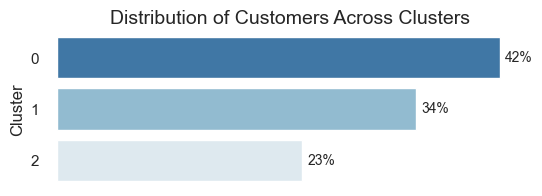

In [527]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (pca_result['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(6, 2))
ax = sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h',palette=palette_r)
sns.despine(left=True, bottom=True) # Remove borders borders

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.0f}%',fontsize=10,va='center')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xlabel('Percentage (%)')
ax.set_xticklabels([])
ax.grid(False)
ax.set_xlabel('')

# Show the plot
plt.show()

Inference
    
The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with clusters 0 and 1 holding around 41% of customers each and cluster 2 accommodating approximately 18% of the customers. 

This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.


# 10. Cluster Analysis and Profiling

Now, let's analyze the individual characteristics of each customer segment to identify their unique behaviors and preferences. This will help me create a detailed profile for each cluster, outlining their key traits.

## 10.1 Radar Chart

Radar charts, also known as spider charts or polar charts, are a valuable tool for customer segmentation due to their ability to visually represent and compare multiple variables simultaneously

In [517]:
#c13639 #f09c7b #fbe3d4 #dbeaf2 #87beda #2f79b5

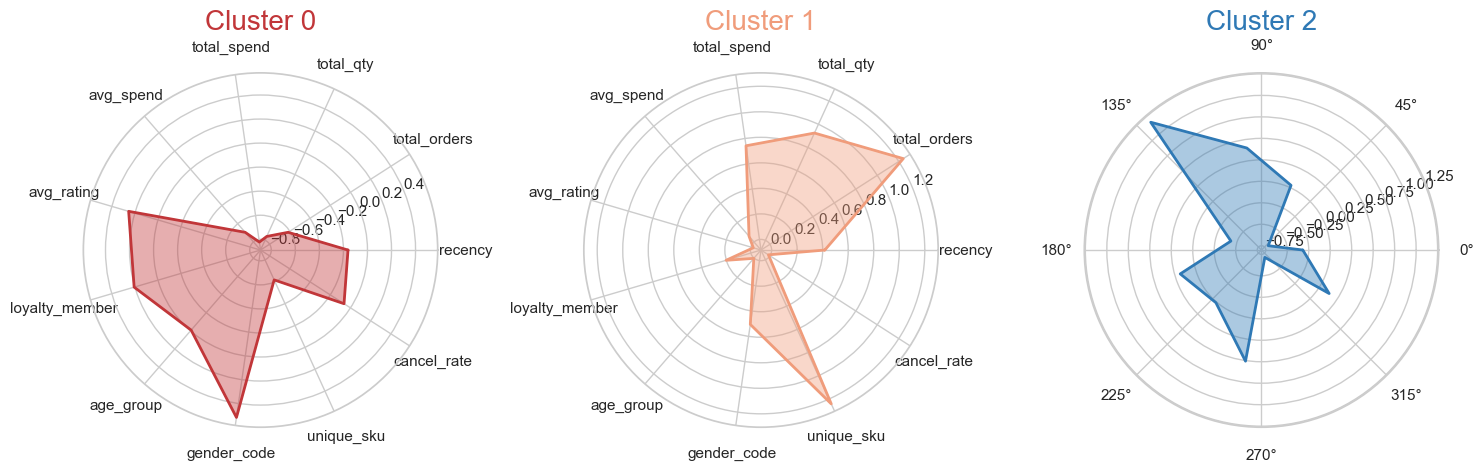

In [532]:
colors =['#c13639',
         '#f09c7b',
         '#2f79b5']

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_scaled.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

# ax[2].set_xticks(angles[:-1])
# ax[2].set_xticklabels(labels[:-1])


# # Add a grid
# ax[0].grid(color='grey', linewidth=0.2)

# Display the plot
plt.tight_layout()
plt.show()

In [535]:
df_customer.groupby('cluster').mean().iloc[:,1:]

recency  total_orders  total_qty  total_spend    avg_spend  \
cluster                                                                  
0        168.669537      1.053916   4.461870  1721.118278  1668.766477   
1        223.466498      2.159545  13.128445  7539.988855  3529.981163   
2        153.814169      1.000742   8.530045  6267.275631  6265.733607   

         avg_rating  loyalty_member  age_group  gender_code  unique_sku  \
cluster                                                                   
0          3.369721        0.206027   2.873514     0.517220    1.053916   
1          3.079975        0.202023   2.892541     0.505436    2.159545   
2          2.646996        0.185460   2.905415     0.506677    1.000742   

         cancel_rate  
cluster               
0           0.319188  
1           0.340582  
2           0.404859

## 10.2 Boxplot

While radar charts offer a visual representation of multiple variables for a single data point, they may not fully capture the distribution or variability of those variables within a customer segment. Boxplots provide a valuable complement to radar charts by offering a more detailed view of the distribution of individual variables within customer segments. This can help identify outliers, compare segments, and gain a deeper understanding of customer profiles.

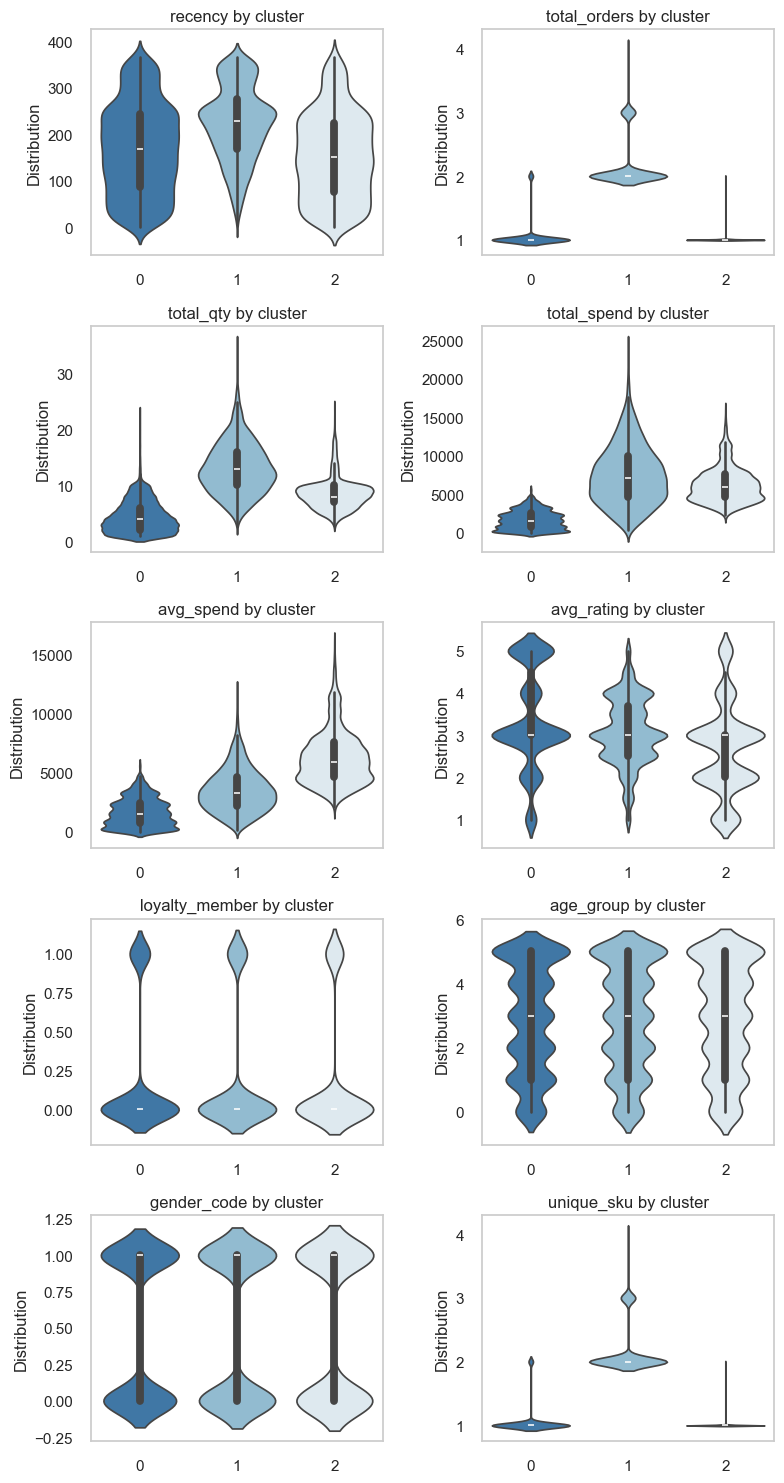

In [537]:
# Select features but exclude 'customer_id' and 'cluster'
features = df_customer.columns[1:-1]  

# Calculate the number of rows and columns for 3 columns per row
n_rows = len(features) // 2  # Integer division for full rows
n_cols = 2  # Target number of columns per row

# Create a figure and subplots with proper sizing
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 3 * n_rows))  # Adjust figsize as needed

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

# Loop through features and create stacked histograms
for i, feature in enumerate(features):
    if i >= len(axes):  # Break loop if all axes are used
        break

    all_data = df_customer[feature]  # Get data for the entire feature
    cluster_data = {}  # Dictionary to store data for each cluster

    # Separate data by cluster
    for cluster in clusters:
        cluster_data[cluster] = df_customer[df_customer['cluster'] == cluster][feature]

    # Create a violin plot with more flexibility than boxplots
    sns.violinplot(
        data=cluster_data,
        palette=palette_r,
        ax=axes[i]
    )

    # Customize plot elements
    axes[i].set_title(f"{feature} by cluster", fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel("Distribution")  # Use "Distribution" for general violin plots
    axes[i].grid(axis='y')  # Optional gridlines for clarity

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

## 10.3 Customer Profiles

### Cluster 0: Minimalist Seniors
This label captures the cluster's focus on purchasing only essential items, likely due to their age and pre-retirement status.

- This segment represents 40% of our customer base.
- **Age Group**: These customers are generally older, in the 55-64 age range, and approaching retirement.
- **Purchase Behavior**: They have the lowest purchase frequency, quantity, and spending of all our customer groups. They seldom buy extra products. Nevertheless, their recent purchases surpass those of other segments.
- **Product Interests**:- Their product variety is the most limited among our customer clusters, which aligns with their age group. Older customers often prioritize purchasing only essential items.



### Cluster 1: Young Professional
This label accurately reflects the cluster's age group and their slightly higher engagement level compared to Cluster 0.

- This segment represents 32% of our customer base.
- **Age Group**: The key difference between this cluster and Cluster 0 is the age group. These customers are younger, typically in the 25-34 age range, and likely young professionals.
- **Purchase Behavior**: They have slightly higher purchase frequency and spending compared to Cluster 0, demonstrating a healthy level of engagement.
- **Product Interests**: Their product variety is slightly more diverse than that of Cluster 0, suggesting a more focused product selection.


### Cluster 2: Established Shoppers
This label highlights the cluster's high level of engagement, frequent purchases, and tendency to purchase add-on products, suggesting they are established customers who regularly shop with the company.

- **Age Group**: This segment comprises established professionals and mid-career individuals in the 35-54 age range.

- **Purchase Behavior**: They are our most engaged customers, exhibiting the highest purchase frequency, quantity, and spending. They often buy extra products.

- **Product Interests**: They have a more diverse product selection compared to other clusters, as demonstrated by their higher SKU count.



# 11. Personalized Product Recommendation System


In the final phase of this project, I am set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters. Earlier in the project, during the customer data preparation stage, I isolated a small fraction (5%) of the customers identified as outliers and reserved them in a separate dataset called `outliers_data`.

Now, focusing on the core 95% of the customer group, I analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting __the top three products__ popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales. For the outlier group, a basic approach could be to recommend random products, as a starting point to engage them.

### 11.1 Extract the customer_id of the outliers and remove their transactions from the main dataframe


In [ ]:
# outlier_customers = outliers_data['customer_id'].astype('int').unique()
df_filtered = df[~df['customer_id'].isin(outliers_data)]
df_filtered.head()

### 12.2 Merge the transaction data with the customer data to get the cluster information for each transaction


In [ ]:
merged_df = df_filtered.merge(df_customer[['customer_id', 'cluster']], on='customer_id', how='inner')
merged_df.head()

### 12.3 Identify the top 10 best-selling products in each cluster based on the total quantity sold


In [ ]:
best_selling_products = merged_df.groupby(['cluster', 'product_type', 'sku'])['quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)
top_products_per_cluster

## 12.4 Create a record of products purchased by each customer in each cluster


In [ ]:
customer_purchases = merged_df.groupby(['customer_id', 'cluster', 'sku'])['quantity'].sum().reset_index()
customer_purchases.head()


## 12.5 Generate recommendations for each customer in each cluster


In [433]:
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = df_customer[df_customer['cluster'] == cluster]['customer_id']

    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['customer_id'] == customer) & (customer_purchases['cluster'] == cluster)]['sku'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['sku'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['sku', 'product_type']].values.flatten().tolist())

## 12.6 Create a dataframe from the recommendations list and merge it with the original customer data


In [434]:
df_recommendation = pd.DataFrame(recommendations, 
                                 columns=['customer_id', 'cluster', 
                                          'sku_1', 'product_1', 
                                          'sku_2', 'product_2',
                                          'sku_3', 'product_3'
                                          ])

## 12.7 Display 10 random rows showing customer recommendations 


In [ ]:
df_recommendation.set_index('customer_id').iloc[:,:].sample(10)